Customer Churn Prediction

In [21]:
#importing libraries for Customer Churn Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GridSearchCV, cross_val_score   
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Metrics & utilities
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import joblib
import warnings
warnings.filterwarnings('ignore')

#Display settings
sns.set_theme(style="whitegrid", palette="pastel")
pd.set_option('display.max_columns', 200)



In [22]:
#Load the dataset
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\Churn_Modelling.csv')   
print("Dataset loaded successfully. Shape:", df.shape)  
df.head()

Dataset loaded successfully. Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#info about the dataset
display(df.info())
display(df.describe(include='all'), 1)

#Missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

#Target variable distribution
target_counts = df['Exited'].value_counts(normalize=False)
print("Target variable distribution:\n", target_counts) 
Churn_proportion = df['Exited'].value_counts(normalize=True)
print("\nProportion of Churned vs Non-Churned Customers:\n", Churn_proportion)

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


1

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Target variable distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64

Proportion of Churned vs Non-Churned Customers:
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


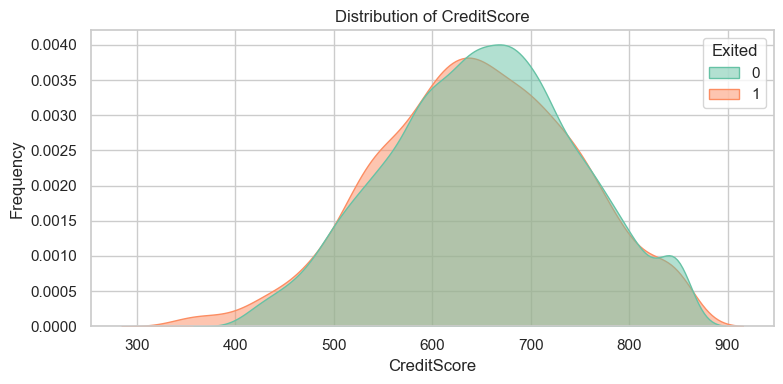

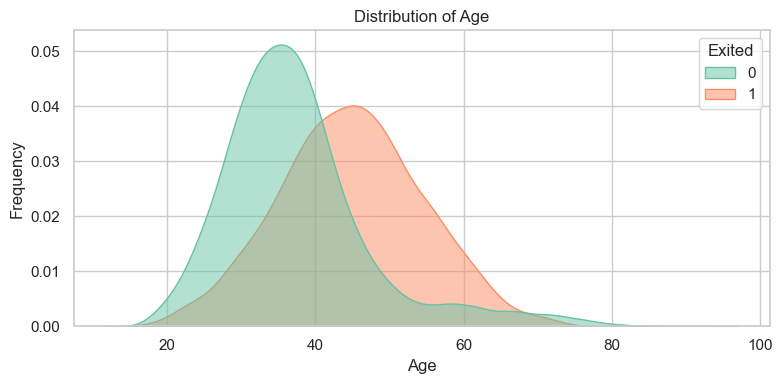

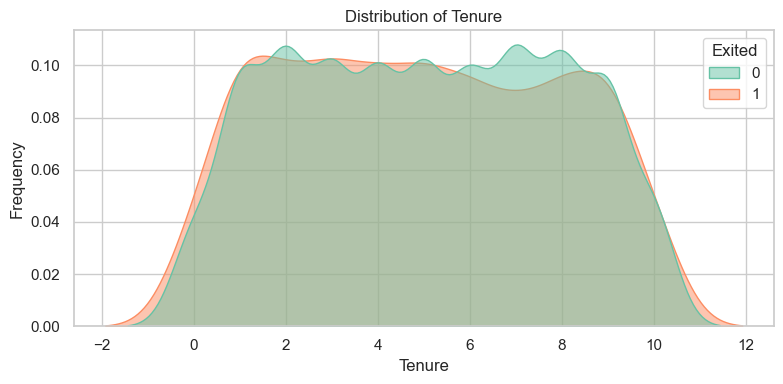

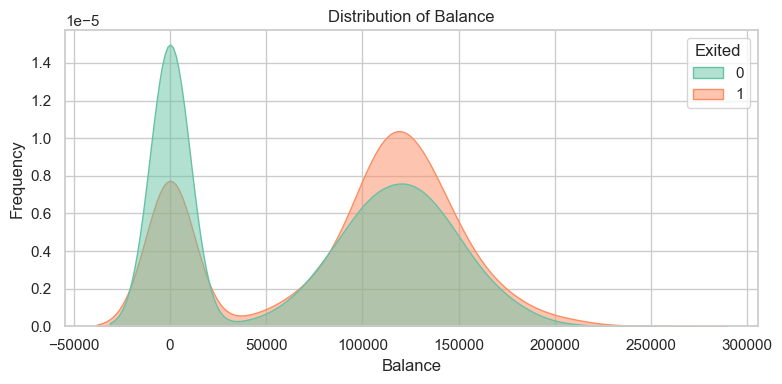

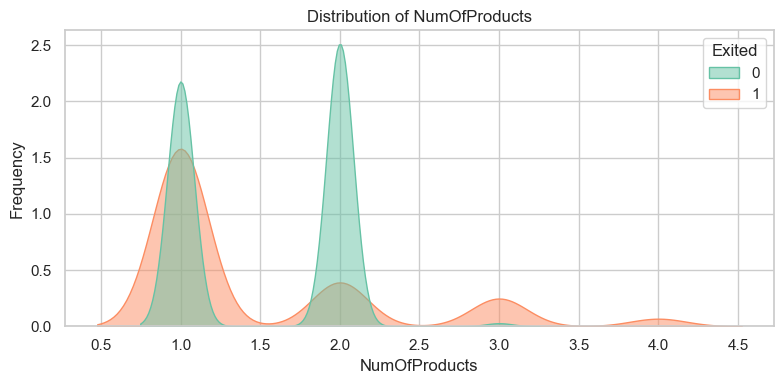

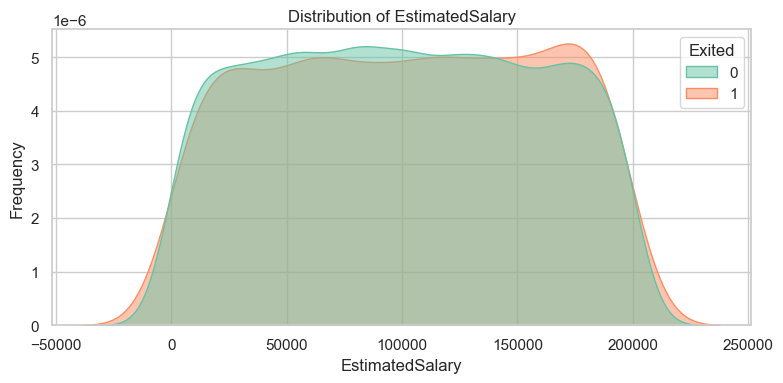

In [24]:
#Exploratory Data Analysis (EDA) visualizations
#Distribution of numerical features, relationships with existed variable, and categorical feature distributions
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# Distribution of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Exited', fill=True, common_norm=False, palette='Set2', alpha=0.5)

    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

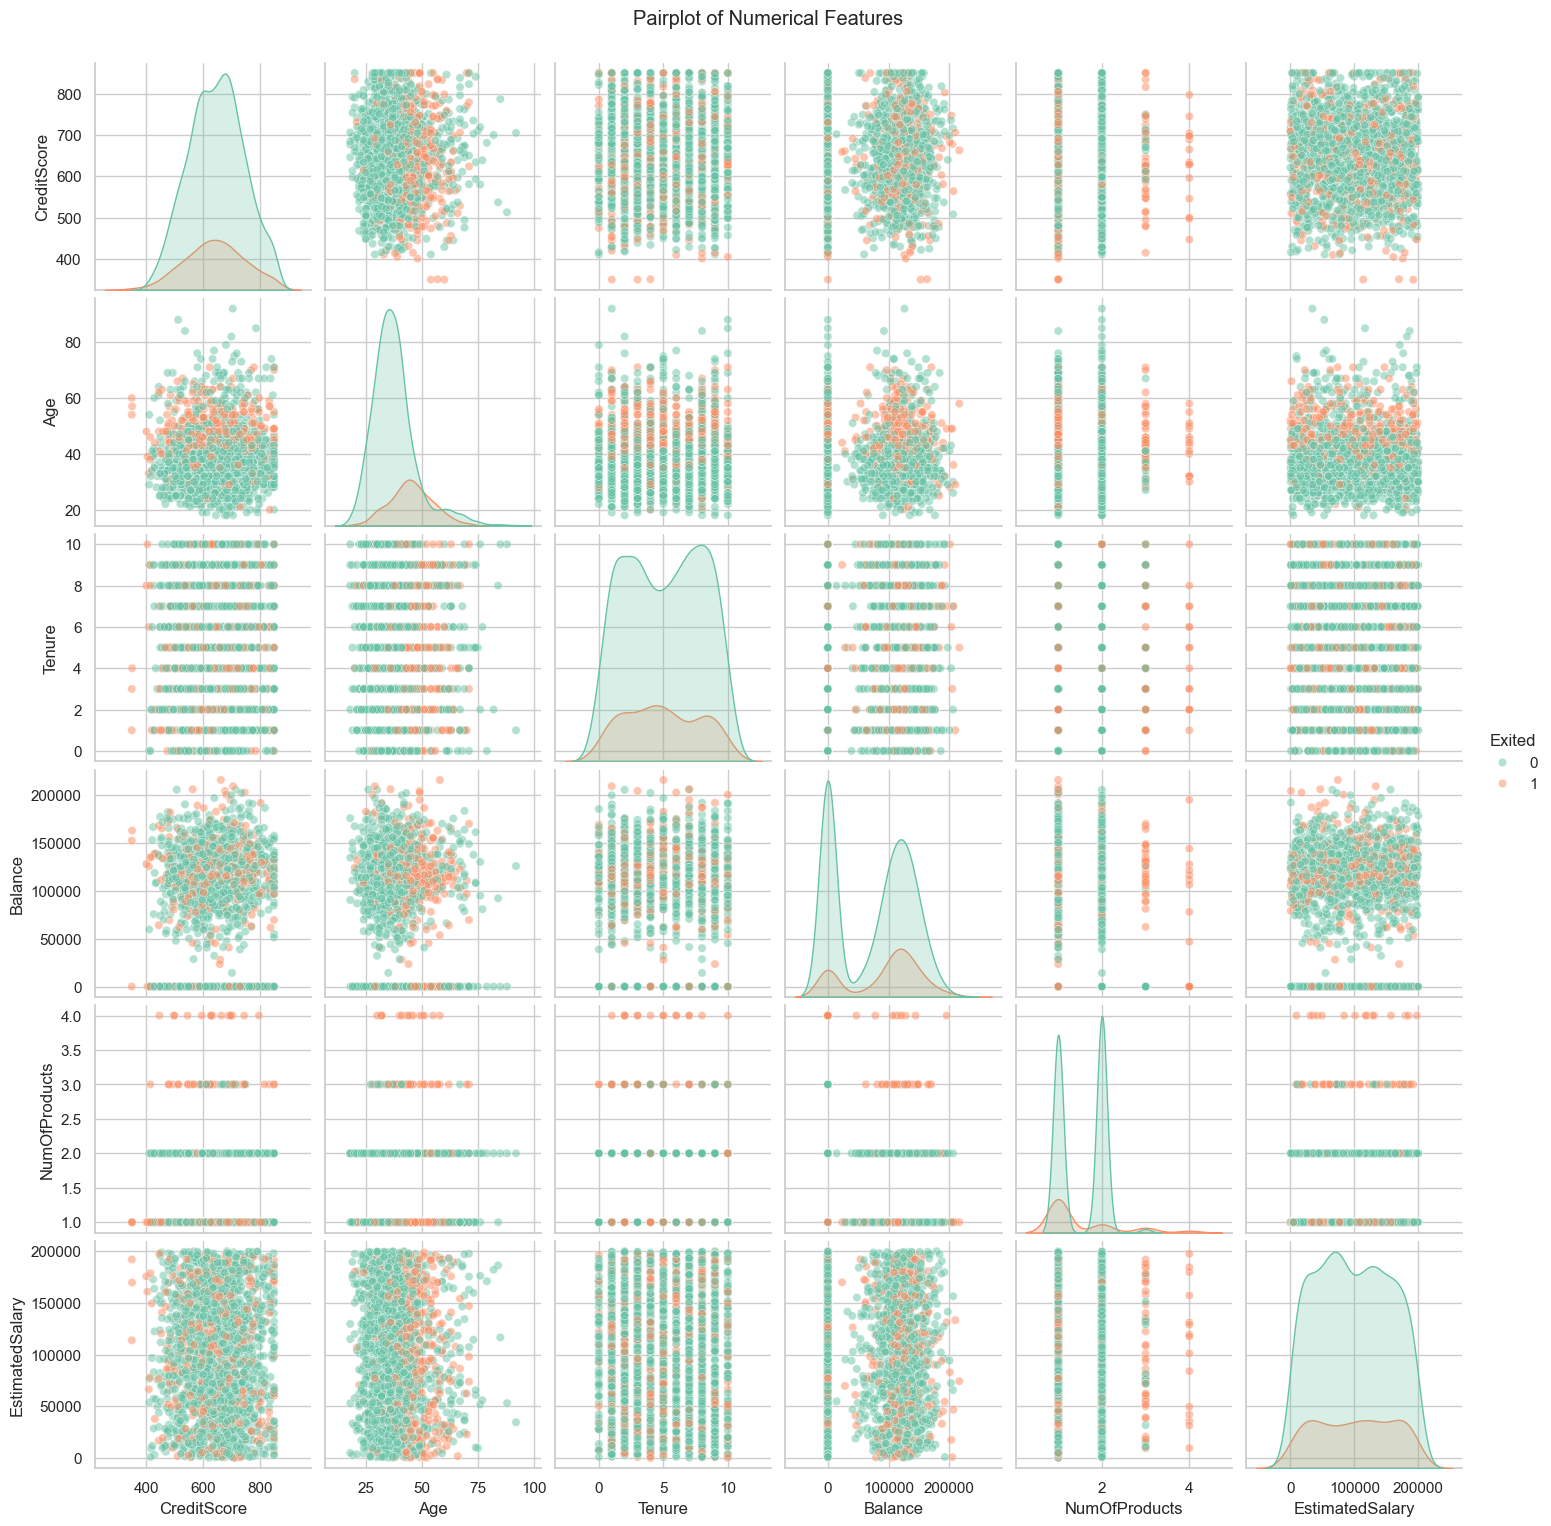

In [25]:
#---Pairplot (sampled for speed)---
sns.pairplot(df.sample(frac=0.2, random_state=42), hue='Exited', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'],  diag_kind='kde', plot_kws={'alpha': 0.5}, palette='Set2')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

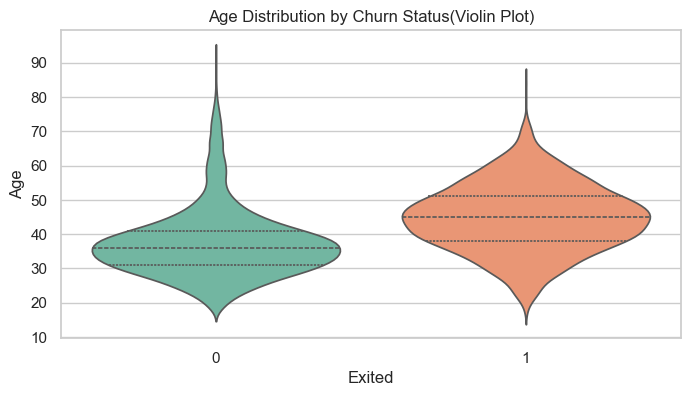

In [26]:
#---Voilin plots for Age
plt.figure(figsize=(8, 4))
sns.violinplot(x='Exited', y='Age', data=df, palette='Set2', inner='quartile')
plt.title('Age Distribution by Churn Status(Violin Plot)')
plt.show()

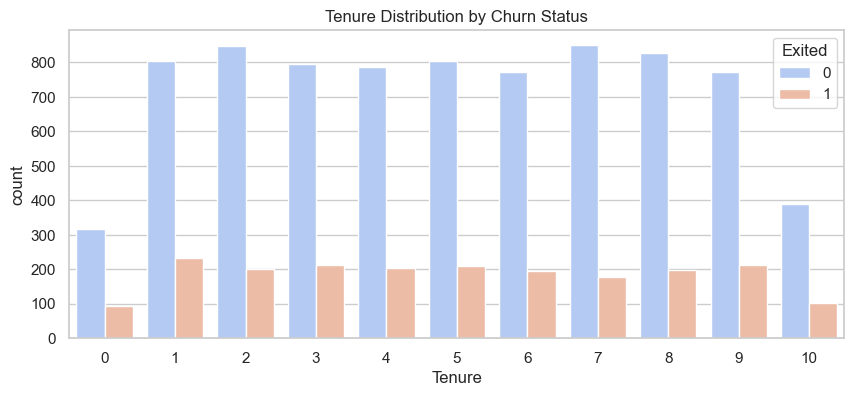

In [27]:
#--- Tenure distribution by Churn Status
plt.figure(figsize=(10, 4))
sns.countplot(x='Tenure', hue='Exited', data=df, palette='coolwarm')
plt.title('Tenure Distribution by Churn Status')
plt.show()

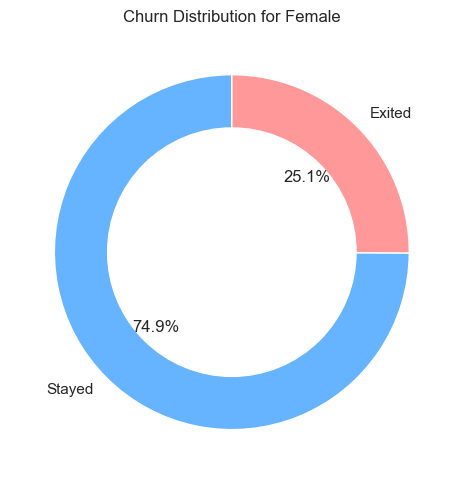

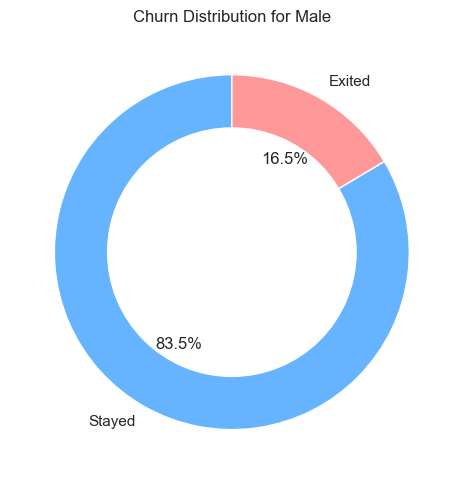

In [28]:
# ... Gender vs Churn Donught Charts ...
gender_counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)   

for gender in gender_counts.index:
    values = gender_counts.loc[gender].reindex([0, 1], fill_value=0)  # 0: Stayed, 1: Exited
    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=['Stayed', 'Exited'], 
            autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    center = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.title(f'Churn Distribution for {gender}')
    plt.tight_layout()
plt.show()


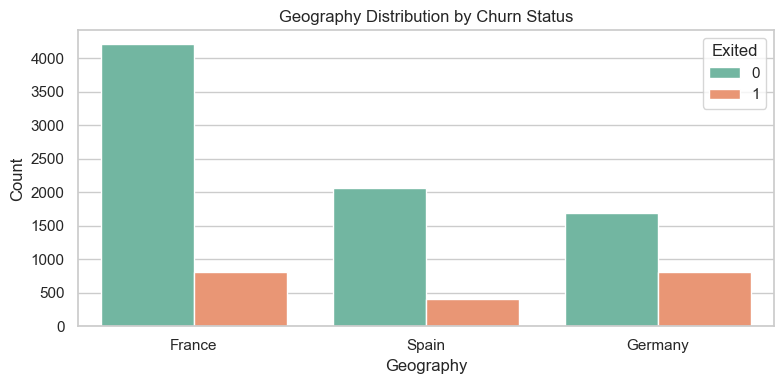

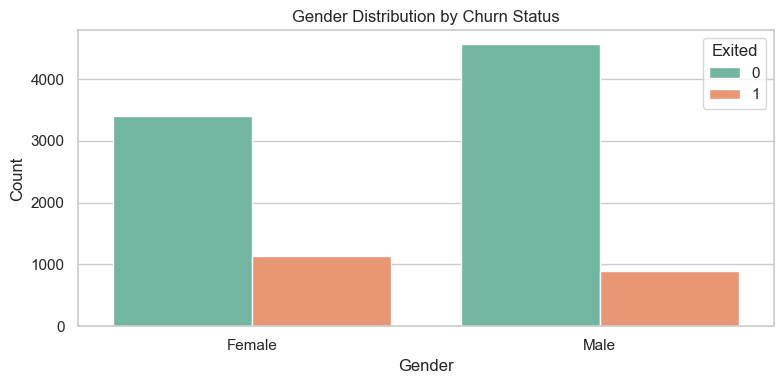

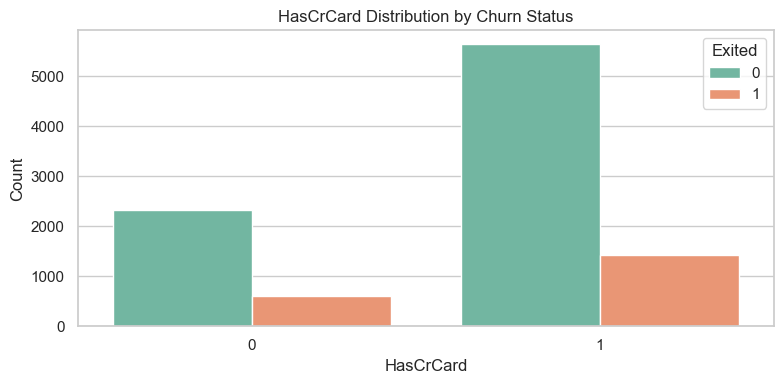

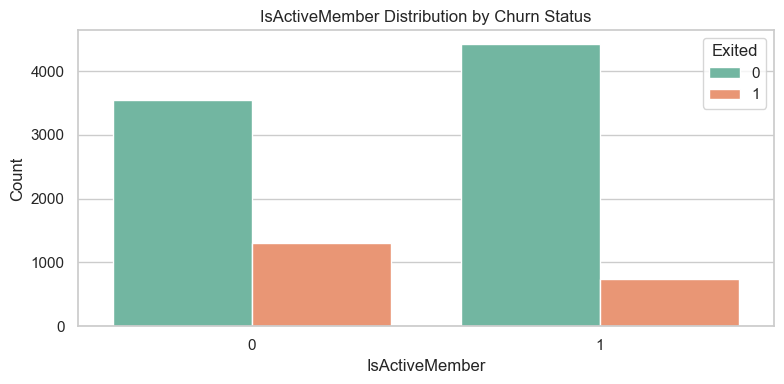

In [29]:
#...Categorical feature distributions...
cate_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for c in cate_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=c, hue='Exited', data=df, palette='Set2')
    plt.title(f'{c} Distribution by Churn Status')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.legend(title='Exited', loc='upper right')
    plt.tight_layout()
    plt.show()

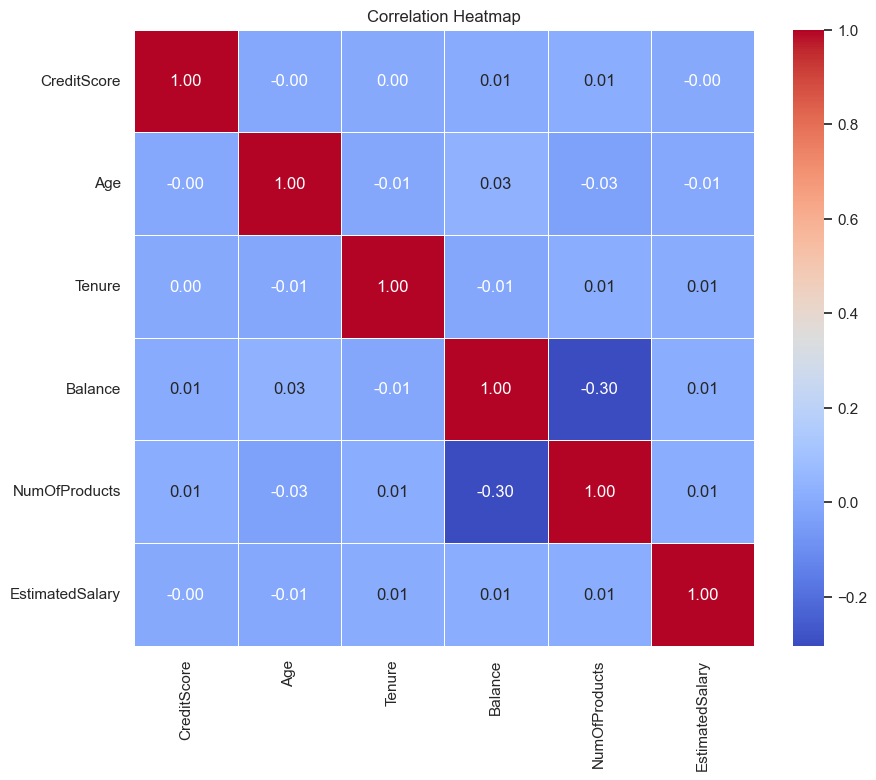

In [30]:
#...Heatmap of correlations...
corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#...Numeric Corralation heatmap...
#Numeric column from feature engineered dataframe
numeric_data = df[numerical_features]
numeric_corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')




,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


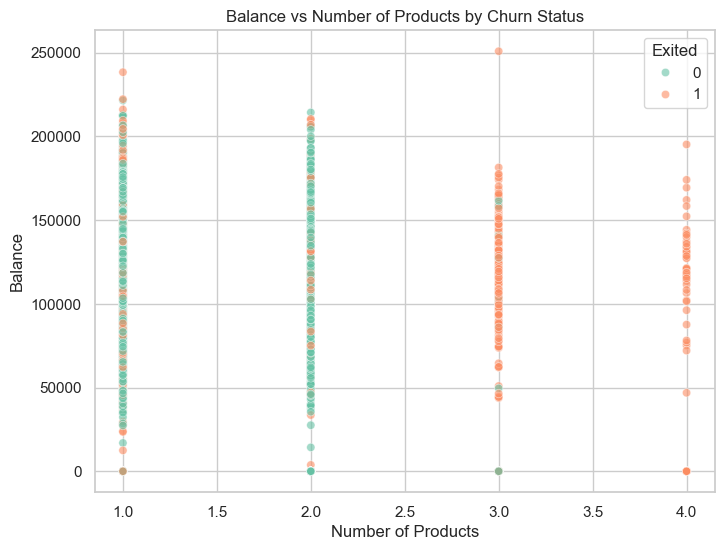

In [32]:
#...Balance vs Products Scatter Plot...
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='NumOfProducts', y='Balance', hue='Exited', palette='Set2', alpha=0.6)
plt.title('Balance vs Number of Products by Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Balance')
plt.show()

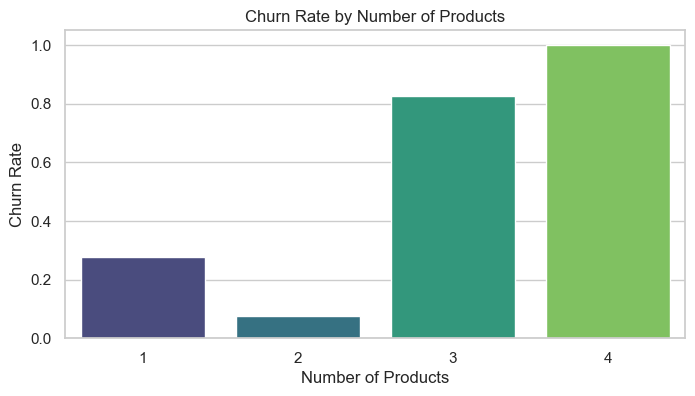

In [33]:
# ...Aggregate churn rate per number of products...
product_churn_rate = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

#Plotting the churn rate by number of products
plt.figure(figsize=(8, 4))
sns.barplot(x=product_churn_rate['NumOfProducts'], y=product_churn_rate['Exited'], palette='viridis')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

In [57]:
#...Feature engineering and preprocessing steps...
#...Create new features...
df_ft = df.copy()
# Balance to Salary Ratio
df_ft['BalanceSalaryRatio'] = df_ft['Balance'] / (df_ft['EstimatedSalary'].replace(0, np.nan))   # Avoid division by zero   
df_ft['BalanceSalaryRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
df_ft['BalanceSalaryRatio'].fillna(df_ft['BalanceSalaryRatio'].median(), inplace=True)  # Fill NaN with median value

#Balance per product
df_ft['BalancePerProduct'] = df_ft['Balance']/(df_ft['NumOfProducts'].replace(0, np.nan))  # Avoid division by zero
df_ft['BalancePerProduct'].fillna(0, inplace=True)  # If NumOfProducts is 0, set BalancePerProduct to 0 

#Age group
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']
df_ft['AgeGroup'] = pd.cut(df_ft['Age'], bins=bins, labels=labels, include_lowest=True)

#Tenure bucket
df_ft['TenureBucket'] = pd.cut(df_ft['Tenure'], bins=[-1, 0, 2, 5, 10, 100], labels=['0', '1-2', '3-5', '6-10', '21+'], include_lowest=True)

#flag for high balance
df_ft['HighBalance'] = (df_ft['Balance'] > df_ft['Balance'].quantile(0.75)).astype(int)

#Checks
df_ft[['BalanceSalaryRatio', 'BalancePerProduct', 'AgeGroup', 'TenureBucket', 'HighBalance']].head()

,BalanceSalaryRatio,BalancePerProduct,AgeGroup,TenureBucket,HighBalance
0,0.000000,0.000000,36-45,1-2,0
1,0.744677,83807.860000,36-45,1-2,0
2,1.401375,53220.266667,36-45,6-10,1
3,0.000000,0.000000,36-45,1-2,0
4,1.587055,125510.820000,36-45,1-2,0


In [39]:
#preprocessing, encoding, and scaling
Target = 'Exited'
drop_cols = ['CustomerId'] # Columns to drop
features = [x for x in df_ft.columns if x not in [Target] + drop_cols]    

numerical_features =  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'BalancePerProduct']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'AgeGroup', 'TenureBucket']

df_ft[categorical_features] = df_ft[categorical_features].astype(str)  # Ensure categorical features are string type
#Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])
print("Numeric features:", numerical_features)
print("Categorical features:", categorical_features)



Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'BalancePerProduct']
Categorical features: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'AgeGroup', 'TenureBucket']


In [42]:
#Train-test split
X = df_ft[features]
y = df_ft[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)
print("Train Churn Proportion:", y_train.mean(), "Test Churn Proportion:", y_test.mean())

Train set shape: (8000, 17) Test set shape: (2000, 17)
Train Churn Proportion: 0.20375 Test Churn Proportion: 0.2035


In [47]:
#Train multiple models with a pipeline and compare using cross-validation
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=200,random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200,random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
   
}

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1, groups=X_train['Surname'])
    results[name] = cv_scores
    print(f"{name} CV AUC Scores: {cv_scores}, Mean AUC: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

LogisticRegression CV AUC Scores: [0.77718032 0.79197687 0.78392532 0.80016289 0.77955283], Mean AUC: 0.7866, Std: 0.0085
RandomForest CV AUC Scores: [0.85423794 0.85256571 0.84755275 0.85052699 0.84715307], Mean AUC: 0.8504, Std: 0.0028
GradientBoosting CV AUC Scores: [0.86685914 0.85161103 0.86548093 0.86661382 0.85815171], Mean AUC: 0.8617, Std: 0.0060
AdaBoost CV AUC Scores: [0.84882714 0.84760693 0.84369071 0.84706794 0.84617431], Mean AUC: 0.8467, Std: 0.0017
SVC CV AUC Scores: [0.83502466 0.825411   0.81413788 0.84017031 0.83765205], Mean AUC: 0.8305, Std: 0.0096


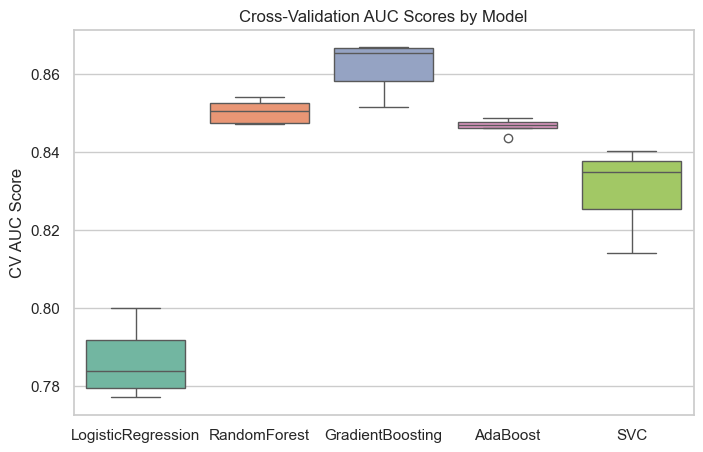

In [50]:
# Boxplot of CV AUC scores
plt.figure(figsize=(8, 5)) 
sns.boxplot(data=[results[name] for name in list(results.keys())], palette='Set2')
plt.xticks(ticks=range(len(results)), labels=list(results.keys()))
plt.ylabel('CV AUC Score')  
plt.title('Cross-Validation AUC Scores by Model')
plt.show()

Best Model: GradientBoosting
Test AUC Score: 0.8704
Test Accuracy Score: 0.8635
Test Precision Score: 0.7617
Test Recall Score: 0.4791
Test F1 Score: 0.5882

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1532   61]
 [ 212  195]]


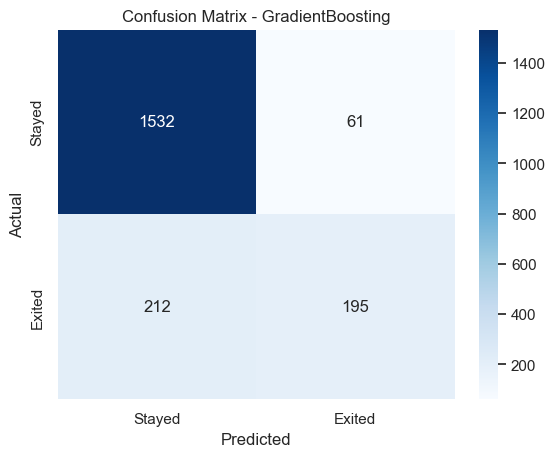

In [52]:
#Fit the best model on the full training data and evaluate on the test set
best_model_name = max(results, key=lambda name: results[name].mean())
print(f"Best Model: {best_model_name}")

# Create pipeline with best model
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', models[best_model_name])])

# Fit the best pipeline on training data
best_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the best model
test_auc = roc_auc_score(y_test, y_pred_proba)
accuracy_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print(f"Test AUC Score: {test_auc:.4f}")
print(f"Test Accuracy Score: {accuracy_score:.4f}")
print(f"Test Precision Score: {precision:.4f}")
print(f"Test Recall Score: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Age                   0.332059
NumOfProducts         0.266092
IsActiveMember_0      0.059583
Balance               0.053030
Geography_Germany     0.049576
BalancePerProduct     0.046339
IsActiveMember_1      0.043104
BalanceSalaryRatio    0.040466
EstimatedSalary       0.031462
CreditScore           0.026389
AgeGroup_46-55        0.014801
Gender_Male           0.009754
Tenure                0.005696
AgeGroup_56-65        0.005473
Geography_France      0.003591
Gender_Female         0.003413
AgeGroup_36-45        0.003405
TenureBucket_0        0.001335
TenureBucket_3-5      0.001304
HasCrCard_0           0.000846
dtype: float64

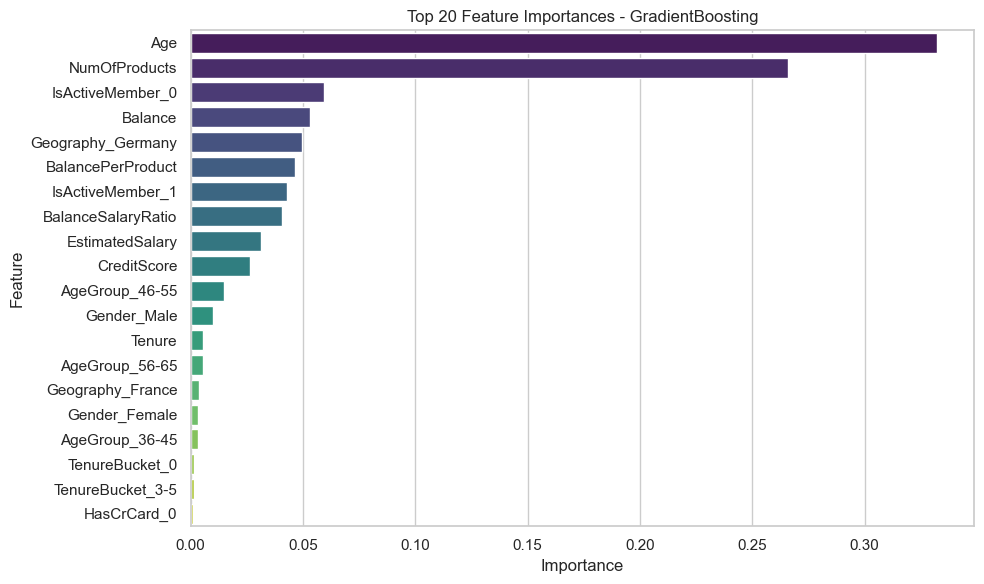

In [54]:
#Feature importance 
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    importances = best_pipeline.named_steps['classifier'].feature_importances_
    feature_names = numerical_features + list(best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    f1 = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    display(f1.head(20))


    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

In [55]:
#Save the best model pipline and preprocessor for future use
joblib.dump(best_pipeline, 'best_churn_model_pipeline.pkl')
print("Best model pipeline saved as 'best_churn_model_pipeline.pkl'")

Best model pipeline saved as 'best_churn_model_pipeline.pkl'


In [56]:
#Test Model with new customer sample
new_customer = pd.DataFrame({
    'CreditScore': [650],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [40],        
    'Tenure': [3],
    'Balance': [50000],
    'NumOfProducts': [2],
    'EstimatedSalary': [60000],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'AgeGroup': ['36-45'],
    'TenureBucket': ['3-5'],
    'HighBalance': [0]
})  

sample_df = pd.DataFrame(new_customer)

#...Apply the same feature engineering steps to the new customer data...
sample_df['BalanceSalaryRatio'] = sample_df['Balance'] / (sample_df['EstimatedSalary'].replace(0, np.nan))   # Avoid division by zero
sample_df['BalanceSalaryRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
sample_df['BalanceSalaryRatio'].fillna(sample_df['BalanceSalaryRatio'].median(), inplace=True)  # Fill NaN with median value

sample_df['BalancePerProduct'] = sample_df['Balance']/(sample_df['NumOfProducts'].replace(0, np.nan))  # Avoid division by zero
sample_df['BalancePerProduct'].fillna(0, inplace=True)  # If NumOfProducts is 0, set BalancePerProduct to 0 
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']
sample_df['AgeGroup'] = pd.cut(sample_df['Age'], bins=bins, labels=labels, include_lowest=True)

sample_df['TenureBucket'] = pd.cut(sample_df['Tenure'], bins=[-1, 0, 2, 5, 10, 100], labels=['0', '1-2', '3-5', '6-10', '21+'], include_lowest=True)
sample_df['HighBalance'] = (sample_df['Balance'] > df_ft['Balance'].quantile(0.75)).astype(int) 

#...drop ID column if exists...
if 'CustomerId' in sample_df.columns:
    sample_df.drop(columns=['CustomerId'], inplace=True)

#...Predict churn probability for the new customer...
churn_probability = best_pipeline.predict_proba(sample_df)[:, 1][0]
print(f"Predicted Churn Probability for the new customer: {churn_probability:.4f}") 
# predicted class based on 0.5 threshold
predicted_class = best_pipeline.predict(sample_df)[0]
print(f"Predicted Churn Class for the new customer: {'Exited' if predicted_class == 1 else 'Stayed'}")

Predicted Churn Probability for the new customer: 0.0541
Predicted Churn Class for the new customer: Stayed
